<a href="https://colab.research.google.com/github/DanielaManate/SentimentAnalysis-TopicModeling/blob/master/SA6_Topic_Modeling_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.4MB/s 
     |████████████████████████████████| 552kB 23.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=a5a7aae291f30f5059ce91902dc9123d0801bb03daab70bdbef4610b27421d30
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=1b4e03333c0670546489318e2739fd66b6b4600ebf015796c88f7da8e880841b
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [2]:
import pandas as pd
import numpy as np
# import ast

# from sklearn.decomposition import LatentDirichletAllocation as LDA

# for tokenizing
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary

import pyLDAvis.gensim

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
path = 'gdrive/My Drive/GH_NLP_Course/Data/'

# Reading Data

In [4]:
# Reading the dataset
reviews = pd.read_csv(path + 'Input/3.input_data_prepped_bow.csv')
reviews.head(2)

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep,text_prep_lim,text_prep_lim_tokens,word_len_prep_lim
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"['arrived', 'reservation', 'pm', 'seat', '-PRO...",27,arrived reservation pm seat right time restura...,"['arrived', 'reservation', 'pm', 'seat', 'righ...",25
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"['receive', 'amazing', 'service', 'food', 'coo...",10,receive amazing service food cook right waitre...,"['receive', 'amazing', 'service', 'food', 'coo...",9


# Latent Dirichlet Allocation

In [5]:
string = reviews['text_prep_lim_tokens'][0]
string

"['arrived', 'reservation', 'pm', 'seat', 'right', 'time', 'resturant', 'fairly', 'loud', 'first', 'family', 'dinner', 'clear', 'pm', 'quiet', 'food', 'service', 'outstanding', 'reasonable', 'price', 'highly', 'recommend', 'mimi', 'late', 'dinner']"

In [6]:
import ast
ast.literal_eval(string)
# reviews['text_prep_lim_tok_list'] = reviews['text_prep_lim_tokens'].apply(lambda x: ast.literal_eval(x))
# reviews.head(2)

['arrived',
 'reservation',
 'pm',
 'seat',
 'right',
 'time',
 'resturant',
 'fairly',
 'loud',
 'first',
 'family',
 'dinner',
 'clear',
 'pm',
 'quiet',
 'food',
 'service',
 'outstanding',
 'reasonable',
 'price',
 'highly',
 'recommend',
 'mimi',
 'late',
 'dinner']

In [7]:
reviews['text_prep_lim'] = reviews['text_prep_lim'].astype(str)
reviews['text_prep_lim_tokens'] = reviews['text_prep_lim'].apply(word_tokenize)
reviews.head(2)

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep,text_prep_lim,text_prep_lim_tokens,word_len_prep_lim
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"['arrived', 'reservation', 'pm', 'seat', '-PRO...",27,arrived reservation pm seat right time restura...,"[arrived, reservation, pm, seat, right, time, ...",25
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"['receive', 'amazing', 'service', 'food', 'coo...",10,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",9


In [8]:
corpus = reviews.text_prep_lim_tokens.to_list()

dictionary = Dictionary(corpus)

final_corpus = [dictionary.doc2bow(text) for text in corpus]

In [9]:
# Each element of common dictionary is a word in the dataset
print(dictionary[0])
print(dictionary[1])
print(dictionary[2])

arrived
clear
dinner


In [10]:
# Common corpus [0] contains bow for first document
# word 0 (arrived) appears once
# word 1 (clear) appears once
# word 2 (dinner) appears twice
final_corpus[0]

[(0, 1),
 (1, 1),
 (2, 2),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 2),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1)]

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [12]:
%%time
ldamodel = LdaModel(final_corpus, num_topics = 2, passes=15,
                    id2word = dictionary,
                    random_state = 5)

CPU times: user 1min 2s, sys: 47.1 ms, total: 1min 2s
Wall time: 1min 3s


In [13]:
topics = ldamodel.print_topics(num_words=2)

In [14]:
topics

[(0, '0.024*"good" + 0.021*"great"'), (1, '0.019*"order" + 0.017*"get"')]

In [15]:
for topic in topics:
    print(topic)

(0, '0.024*"good" + 0.021*"great"')
(1, '0.019*"order" + 0.017*"get"')


## Visualization

In [16]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, final_corpus, 
                                      dictionary, 
                                      sort_topics=False)
pyLDAvis.display(lda_display)

- Saliency: a measure of how much the term tells you about the topic.
- Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.
- The size of the bubble measures the importance of the topics, relative to the data.
- First, we got the most salient terms, means terms mostly tell us about what’s going on relative to the topics. We can also look at individual topic.

In [17]:
pyLDAvis.save_html(lda_display, path + 'Output/5.lda_2.html')

## What is the topic distribution for a random review?

In [18]:
# Review no. 5
print(corpus[4])

['awesome', 'service', 'great', 'food', 'amazing', 'server']


In [19]:
ldamodel[dictionary.doc2bow(corpus[4])]
# Mostly topic 1
# This reviews belongs to each topic, but at a different percentage, 
# represented by the gamma value. Some documents fit in some topics 
# better than others. As shown below, this review has a 
# higher gamma value for Topic 1.

[(0, 0.8840138), (1, 0.11598624)]

# LDA: 15 Topics

In [20]:
%%time
ldamodel = LdaModel(final_corpus, num_topics = 15, passes=15,
                    id2word = dictionary,
                    random_state = 5)
topics = ldamodel.print_topics(num_words=2)
for topic in topics:
    print(topic)

(0, '0.037*"place" + 0.033*"good"')
(1, '0.038*"taco" + 0.020*"burrito"')
(2, '0.056*"fish" + 0.031*"steak"')
(3, '0.100*"pizza" + 0.050*"wing"')
(4, '0.024*"breakfast" + 0.021*"good"')
(5, '0.033*"chicken" + 0.021*"order"')
(6, '0.025*"go" + 0.022*"food"')
(7, '0.036*"donut" + 0.022*"wait"')
(8, '0.040*"service" + 0.028*"great"')
(9, '0.038*"sushi" + 0.029*"roll"')
(10, '0.019*"place" + 0.018*"bar"')
(11, '0.057*"great" + 0.051*"food"')
(12, '0.026*"ice" + 0.025*"place"')
(13, '0.029*"order" + 0.022*"get"')
(14, '0.046*"burger" + 0.035*"salad"')
CPU times: user 1min 23s, sys: 47.7 ms, total: 1min 23s
Wall time: 1min 23s


In [21]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, final_corpus, 
                                      dictionary, 
                                      sort_topics=False)
pyLDAvis.display(lda_display)

In [22]:
pyLDAvis.save_html(lda_display, path + 'Output/5.lda_15.html')

# K Means

In [23]:
dtm_bow = pd.read_csv(path + 'Output/1.dtm_1_bow.csv')

## Elbow Method

In [24]:
%%time
k_range = range(1,8)
SSE = []

for i in k_range:
    print(i)
    kmeans = KMeans(n_clusters = i,
                    random_state = 5)
    kmeans.fit(dtm_bow)
    SSE.append(kmeans.inertia_)

1
2
3
4
5
6
7
CPU times: user 6min 7s, sys: 17.8 s, total: 6min 25s
Wall time: 5min 43s


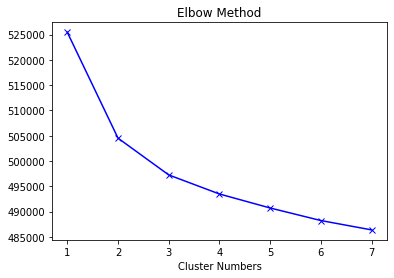

In [25]:
plt.plot(k_range, SSE, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Cluster Numbers')
plt.show()

In [26]:
final_clus_no = 2

In [27]:
kmeans = KMeans(n_clusters = final_clus_no,
                         random_state = 5)
kmeans.fit(dtm_bow)

centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = dtm_bow.columns

In [28]:
terms

Index(['aaabar', 'aaron', 'abacus', 'ability', 'able', 'absolute',
       'absolutely', 'absurd', 'abundance', 'abundant',
       ...
       'zero', 'zesty', 'zillion', 'zipps', 'ziti', 'zoe', 'zone', 'zucchini',
       'zuchinni', 'zupa'],
      dtype='object', length=5999)

In [29]:
for i in range(0,final_clus_no):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:2]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['order', 'get']
cluster1:
['food', 'good']


## What is the topic distribution for a random review?

In [30]:
reviews['kmeans_topic'] = kmeans.predict(dtm_bow)
reviews.head()

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep,text_prep_lim,text_prep_lim_tokens,word_len_prep_lim,kmeans_topic
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"['arrived', 'reservation', 'pm', 'seat', '-PRO...",27,arrived reservation pm seat right time restura...,"[arrived, reservation, pm, seat, right, time, ...",25,1
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"['receive', 'amazing', 'service', 'food', 'coo...",10,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",9,1
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,1,breakfast delicious waitress awesome steak egg...,"['breakfast', 'delicious', 'waitress', 'awesom...",15,breakfast delicious waitress awesome steak egg...,"[breakfast, delicious, waitress, awesome, stea...",15,1
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,1,eaten twice lunch first time french dip mom fi...,"['eaten', 'twice', 'lunch', 'first', 'time', '...",75,eaten twice lunch first time french dip mom fi...,"[eaten, twice, lunch, first, time, french, dip...",74,1
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,1,awesome service great food buffy amazing server,"['awesome', 'service', 'great', 'food', 'buffy...",7,awesome service great food amazing server,"[awesome, service, great, food, amazing, server]",6,1


In [31]:
# Review no. 5
print(corpus[4])

['awesome', 'service', 'great', 'food', 'amazing', 'server']


In [32]:
reviews['kmeans_topic'].iloc[4]
# Topic 1

1

In [33]:
# Review no. 1362
print(corpus[1361])

['bad', 'restaurant', 'date', 'first', 'waiter', 'take', 'drink', 'order', 'least', 'minute', 'seat', 'get', 'drink', 'ready', 'order', 'return', 'get', 'main', 'course', 'another', 'minute', 'refill', 'drink', 'barely', 'get', 'order', 'right', 'bring', 'go', 'box', 'food', 'ok', 'service', 'kill', 'whole', 'experience', 'never', 'return']


In [34]:
reviews['kmeans_topic'].iloc[1361]
# Topic 0

0

# Conclusions

- **LDA** is a fuzzy (soft) clustering technique <=> a document can belong to more than one cluster.
- **KMeans** is a hard clustering technique <=> each document will belong to exactly one cluster. 
- => LDA gives more realistic results than k-means when considering natural language, due to the fact that a piece of text can belong to multiple topics.